<a href="https://colab.research.google.com/github/AngleKit/MSE7530Codes/blob/main/KWWfitting_wErrors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
! git clone https://github.com/cbishop4/MSE7530

Cloning into 'MSE7530'...
remote: Enumerating objects: 530, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 530 (delta 26), reused 5 (delta 5), pack-reused 494 (from 2)
Receiving objects: 100% (530/530), 75.82 MiB | 39.88 MiB/s, done.
Resolving deltas: 100% (188/188), done.


In [3]:
def KWW(time, r_0, tau,beta,C): # Coded in the empirical fuction
  return r_0 * np.exp(-(time/tau)**beta) + C

## Calculating the Autocorrelation Function from scratch

In [4]:
#
#pd.read_csv('/content/MSE7530/sampledata/IperpIpara.csv',header=0)

,Iperp,Unnamed: 1,Ipara,Unnamed: 3
0,X,Y,X,Y
1,-0.022933149868094915,5932.60520582502,2.1684567264202315,4583.9143064633245
2,13.782823070748805,5813.037495700034,20.82657624453293,4715.16290726817
3,23.644077514046558,5908.44513243894,28.90341321713879,4825.679394564843
4,40.73691854909612,5741.296869625043,44.49358690844758,4924.362376529559
...,...,...,...,...
90,1918.6954313889305,5496.1742591773545,NaN,NaN
91,1948.5609448457749,5498.340213278294,NaN,NaN
92,1977.7502579979364,5518.235294117647,NaN,NaN
93,1991.950464396285,5463.2094943240445,NaN,NaN


In [8]:
df_I = pd.read_csv('/content/MSE7530/sampledata/IperpIpara.csv',header=1) # relaoded date with ined title tabs
df_I = df_I.rename(columns={'X': 'tperp', 'Y': 'Iperp', 'X.1': 'tpara', 'Y.1': 'Ipara'})

In [9]:
df_I # Get data frame, but the lower data point do not exist due to the source material being unreadble

,tperp,Iperp,tpara,Ipara
0,-0.022933,5932.605206,2.168457,4583.914306
1,13.782823,5813.037496,20.826576,4715.162907
2,23.644078,5908.445132,28.903413,4825.679395
3,40.736919,5741.296870,44.493587,4924.362377
4,39.422085,5830.048160,70.539821,5007.619539
...,...,...,...,...
89,1918.695431,5496.174259,NaN,NaN
90,1948.560945,5498.340213,NaN,NaN
91,1977.750258,5518.235294,NaN,NaN
92,1991.950464,5463.209494,NaN,NaN


Text(0, 0.5, 'Intensity')

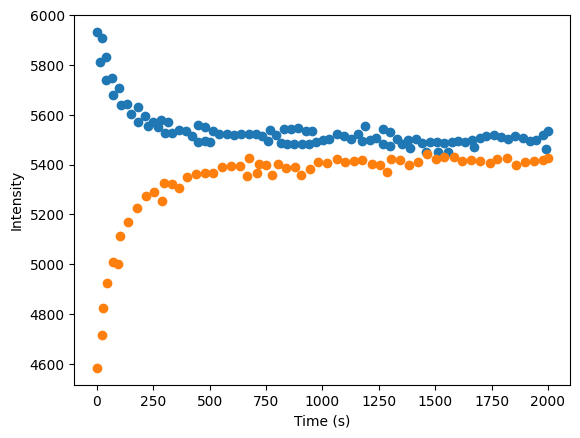

In [12]:
plt.plot(df_I['tperp'], df_I['Iperp'],'o')
plt.plot(df_I['tpara'], df_I['Ipara'],'o')
plt.xlabel('Time (s)')
plt.ylabel('Intensity')
# interpolate the the time curve to fit

### Aside: data interpolation

In [16]:
## Need to interpolate
from scipy.interpolate import interp1d
# make a function fperp that descirbes your intensity vs time for the perbendicular direction
fperp = interp1d(df_I['tperp'], df_I['Iperp'])

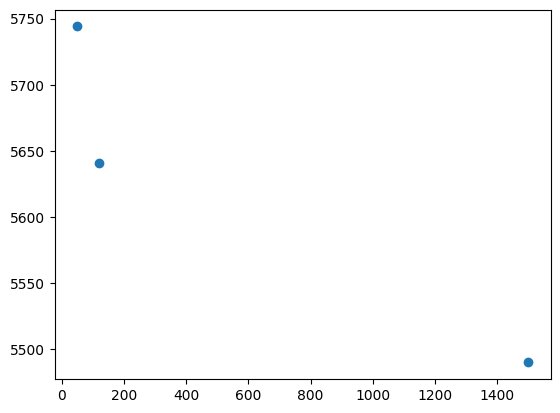

In [17]:
# example calc
discrete_time = np.asanyarray([50.,120.,1500.])
I_discrete = fperp(discrete_time)
fperp = interp1d(df_I['tperp'], df_I['Iperp'])
plt.plot(discrete_time, I_discrete,'o')


In [19]:
#actual interpolations to find the projected I_perp at each real
# value of I_para
newperp = fperp(df_I['tpara'])

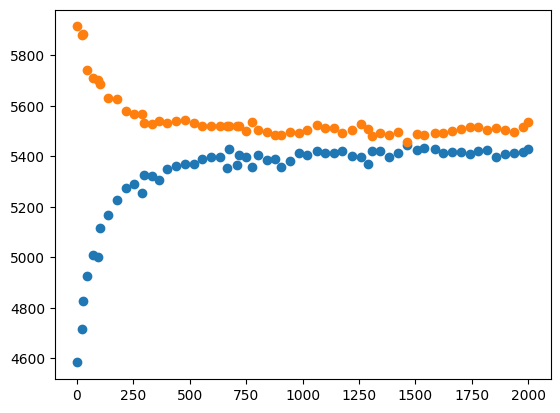

In [20]:
plt.plot(df_I['tpara'], df_I['Ipara'],'o')
plt.plot(df_I['tpara'], newperp,'o')

## Make these into the correlation function

In [21]:
t = df_I['tpara'] # Made data frame part into their own variable for ease
Ipara = df_I['Ipara'] # actual extracted data point
Iperp = newperp # interpolated data point

In [23]:
r = (Ipara - Iperp) / (Ipara + 2*Iperp) # eqn for correlation function

Text(0, 0.5, 'Correlation Function')

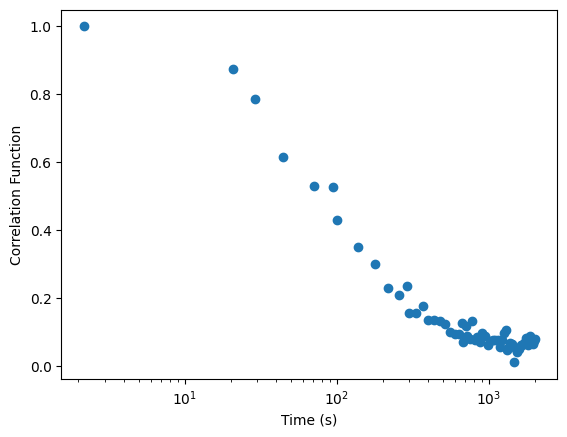

In [25]:
plt.plot(t,r/(r[0]),'o') # correlection fuction normalize by its startong value
plt.semilogx()
plt.xlabel('Time (s)')
plt.ylabel('Correlation Function')

## KWW fitting (repeated from last time)

In [26]:
K315 = pd.read_csv('/content/MSE7530/sampledata/315K.csv',header=None)
K317 = pd.read_csv('/content/MSE7530/sampledata/317K.csv',header=None)
K320 = pd.read_csv('/content/MSE7530/sampledata/320K.csv',header=None)
K323 = pd.read_csv('/content/MSE7530/sampledata/323K.csv',header=None)

Text(0, 0.5, 'Intensity')

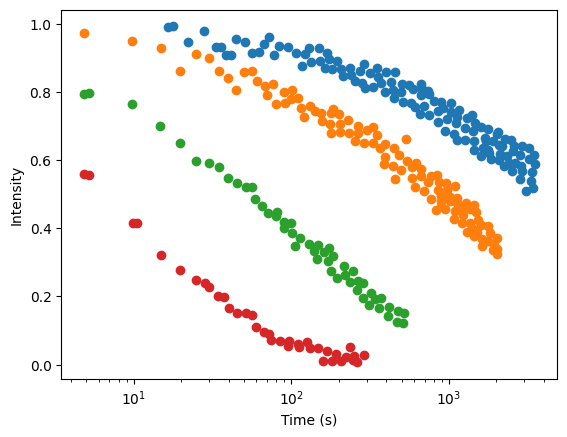

In [28]:
for k in [K315, K317, K320, K323]:
  plt.plot(k[0],k[1],'o')
plt.semilogx()
plt.xlabel('Time (s)')
plt.ylabel('Intensity')

In [29]:
from scipy.optimize import curve_fit

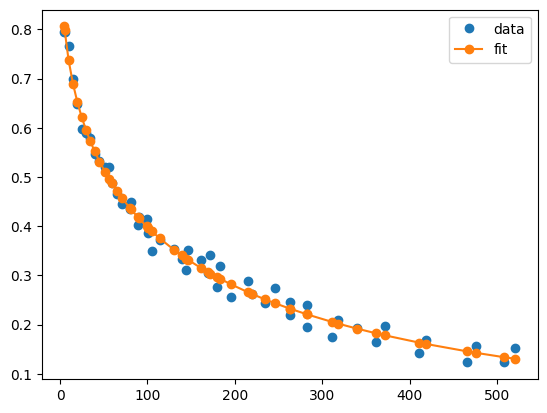

In [36]:
curve = K320
popt, pcov = curve_fit(KWW, curve[0], curve[1]) #fitting data to user defind kww function
plt.plot(curve[0], curve[1],'o', label='data')
plt.plot(curve[0], KWW(curve[0],*popt),'o-', label ="fit")
plt.legend() # Important to show how you got the raw data and then processed to show

In [43]:
popt
# r_0, tau, beta, C

array([ 1.03481048e+00,  1.23565981e+02,  4.57937487e-01, -1.92840789e-02])

In [45]:
pcov #4 by 4 materix

array([[ 2.06099186e-02,  2.20686255e+00, -1.05755932e-02,
        -1.05175831e-02],
       [ 2.20686255e+00,  4.97083441e+02, -1.08499443e+00,
        -1.45676930e+00],
       [-1.05755932e-02, -1.08499443e+00,  5.49898764e-03,
         5.33674811e-03],
       [-1.05175831e-02, -1.45676930e+00,  5.33674811e-03,
         5.79273397e-03]])

In [46]:
np.diag(pcov) # function to take the outer diagonal
# error bars for fitted param come from sqrt(diagonal) of
# convariance materix

array([2.06099186e-02, 4.97083441e+02, 5.49898764e-03, 5.79273397e-03])

In [47]:
errbars = np.sqrt(np.diag(pcov))

In [40]:
print(f'The fit parameters are r_0 = {popt[0]}, tau = {popt[1]}, beta = {popt[2]}, and C = {popt[3]}')
print(f'The errors on the fit parameters are r_0 = {errbars[0]}, tau = {errbars[1]}, beta = {errbars[2]}, and C = {errbars[3]}')

The fit parameters are r_0 = 1.034810475550607, tau = 123.565980952591, beta = 0.4579374867908582, and C = -0.01928407889788452
The errors on the fit parameters are r_0 = 0.14356154988828732, tau = 22.295368155889914, beta = 0.07415515920067212, and C = 0.07611001226547172


In [41]:
def KWW(time, r_0, tau,beta,C):
  return r_0 * np.exp(-(time/tau)**beta) + C

### Fixing parameters
We know that the correlation function is equal to 1 at t = 0, and that our parameter C is equal to 0. We could rewrite the equation, or we could fix these in our fitting.



/tmp/ipython-input-197644910.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(KWW, curve[0], curve[1])


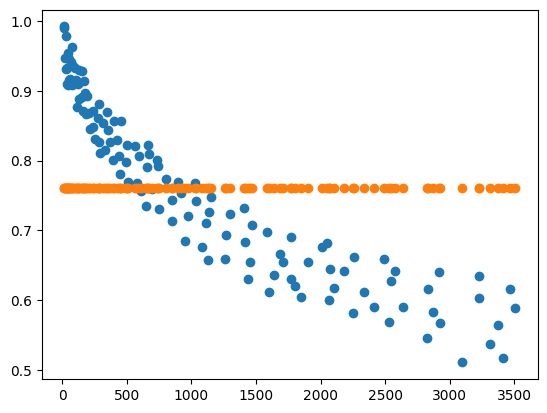

In [48]:
curve = K315
popt, pcov = curve_fit(KWW, curve[0], curve[1])
plt.plot(curve[0], curve[1],'o')
plt.plot(curve[0], KWW(curve[0],*popt),'o')

Question: Why did this fail?

*   need to get upi starting parameter
*   allow it to run without to much issues



In [51]:
# from correlation function we defined that r_0 = c=0)
bounds = ([0.9999, 0.0, 0., 0.], [1.0001, 1000., 1.0, 0.00001])

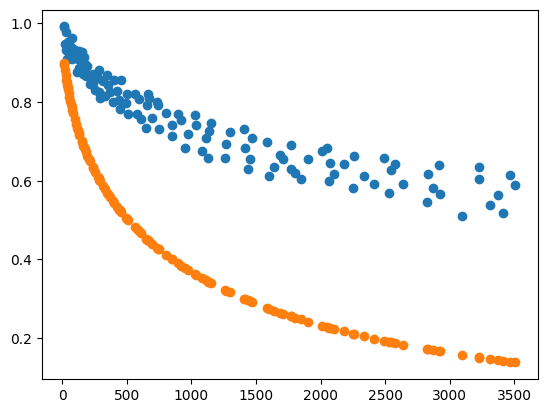

In [ ]:
curve = K315
popt, pcov = curve_fit(KWW, curve[0], curve[1],bounds=bounds)
plt.plot(curve[0], curve[1],'o')
plt.plot(curve[0], KWW(curve[0],*popt),'o')

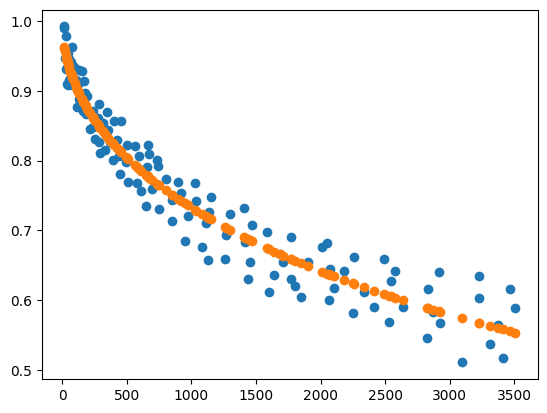

In [52]:
bounds = ([0.9999, 100.0, 0., 0.], [1.0001, 100000., 1.0, 0.00001])
curve = K315
popt, pcov = curve_fit(KWW, curve[0], curve[1],bounds=bounds)
plt.plot(curve[0], curve[1],'o')
plt.plot(curve[0], KWW(curve[0],*popt),'o')

In [53]:
np.sqrt(np.diag(pcov))

array([1.00200492e+00, 2.70870563e+04, 1.65548413e-01, 9.71502041e-01])

In [54]:
popt

array([1.00010000e+00, 9.77242793e+03, 5.11640386e-01, 1.00000000e-05])

## Task: Find the effect of fixing $r_{0}$ and $C$ on error bars.

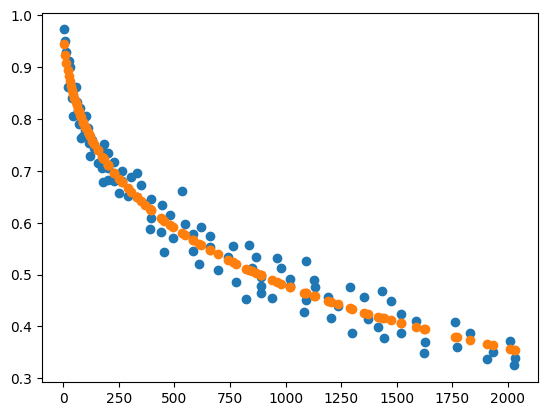

In [68]:
bounds = ([0.9999, 60.0, 0., 0.], [1.0001, 10000., 1.0, 0.00001])
curve = K317
popt, pcov = curve_fit(KWW, curve[0], curve[1],bounds=bounds)
plt.plot(curve[0], curve[1],'o')
plt.plot(curve[0], KWW(curve[0],*popt),'o')

In [70]:
popt

array([1.00010000e+00, 1.88993233e+03, 4.80501191e-01, 9.99999999e-06])

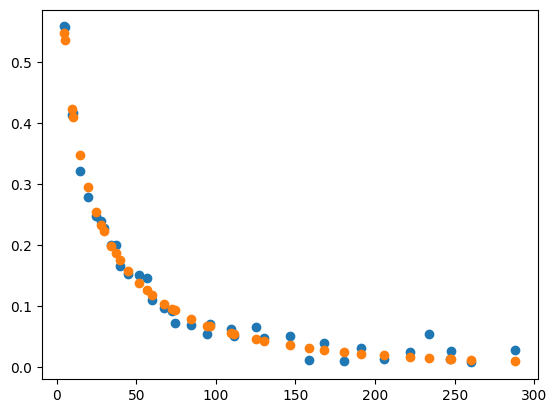

In [78]:
bounds = ([0.9999, 10, 0., 0.], [1.0001, 5000., 1.0, 0.00001])
curve = K323
popt, pcov = curve_fit(KWW, curve[0], curve[1],bounds=bounds)
plt.plot(curve[0], curve[1],'o')
plt.plot(curve[0], KWW(curve[0],*popt),'o')

In [79]:
popt

array([1.00010000e+00, 1.32427963e+01, 5.03554772e-01, 1.00000000e-05])

## Task: Plot the values of $\tau$ and $\beta$ as a function of temperature, with errors

## How does strain affect the $\tau_{KWW}$ of PLA glasses?

In [ ]:
dfstrain = pd.read_csv('/content/MSE7530/sampledata/315K.csv',header=None)